# User behaviour

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-muted")

from sqlalchemy import create_engine, inspect   #presto

import sklearn
from sklearn.model_selection import train_test_split



from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics m


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

import seaborn as sns
from scipy import misc
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy import stats, linalg
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
# from sklearn.cross_validation import train_test_split
import sklearn.feature_selection as feature_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sk
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
import scipy
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_tree
import scipy
import graphviz
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

C:\Users\leticia.colombo\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
sns.set_style("white")

## Cargamos la data desde Presto

In [4]:
#setear usuario
usuario={"usuario":"leticia.colombo","contraseña":"Z7GWYgGGGsmvRZsZ7BTTF"}

In [5]:
#crear conexión
url="presto://"+usuario['usuario']+"@hue.peya.co:8889/hive/datalake"
engine = create_engine(url)
connection = engine.connect()

In [6]:
#Definir consulta
query='''
select *
from default.hu_lu
'''

In [10]:
#Ejecutar la consulta
data = pd.read_sql(query,con=connection)
data.head()

,userid,q,user_cat,total_sessions,total_orders,avg_time,avg_amount,logistic_orders,lunch_orders,dinner_orders,...,nv_orders,total_products,orders_discount,orders_voucher,confirmed_orders,couisine_diversitiy,hamburguesas,pizzas,helados,othersi
0,12170871,Q4,LU,1,1,2862509.00,2200.00,1,0,1,...,0,2,0,0,1,1,0,0,0,1
1,3129468,Q3,LU,2,2,1754391.00,248.33,2,2,0,...,0,3,0,0,2,2,1,0,0,2
2,14213897,Q4,LU,2,2,2928139.50,569.00,2,1,1,...,0,2,0,0,2,2,1,1,0,2
3,1903377,Q4,LU,8,8,3537115.25,736.75,6,5,3,...,1,16,1,1,8,5,1,3,0,7
4,292196,Q3,LU,4,5,2782647.20,327.42,4,2,3,...,0,5,4,0,5,2,0,4,0,5


In [11]:
#copia de la base
hulu=data.copy()

In [12]:
hulu.head(30)

,userid,q,user_cat,total_sessions,total_orders,avg_time,avg_amount,logistic_orders,lunch_orders,dinner_orders,...,nv_orders,total_products,orders_discount,orders_voucher,confirmed_orders,couisine_diversitiy,hamburguesas,pizzas,helados,othersi
0,12170871,Q4,LU,1,1,2.862509e+06,2200.00,1,0,1,...,0,2,0,0,1,1,0,0,0,1
1,3129468,Q3,LU,2,2,1.754391e+06,248.33,2,2,0,...,0,3,0,0,2,2,1,0,0,2
2,14213897,Q4,LU,2,2,2.928140e+06,569.00,2,1,1,...,0,2,0,0,2,2,1,1,0,2
3,1903377,Q4,LU,8,8,3.537115e+06,736.75,6,5,3,...,1,16,1,1,8,5,1,3,0,7
4,292196,Q3,LU,4,5,2.782647e+06,327.42,4,2,3,...,0,5,4,0,5,2,0,4,0,5
5,7083134,Q4,HU,19,23,1.543964e+06,411.64,3,13,10,...,0,33,7,0,23,3,10,12,0,23
6,14185865,Q3,LU,2,2,8.253880e+05,116.67,0,0,2,...,0,3,2,2,2,1,0,2,0,2
7,3168182,Q4,LU,1,1,3.061516e+06,640.00,0,0,1,...,0,2,0,0,1,1,0,0,0,1
8,16175744,Q4,LU,3,3,2.732912e+06,524.20,2,1,2,...,0,5,1,0,3,2,1,2,0,3
9,2991303,Q4,LU,6,6,5.998686e+05,558.88,0,0,6,...,0,10,3,0,6,2,0,3,0,6


In [13]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508269 entries, 0 to 508268
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   userid               508267 non-null  object 
 1   q                    508269 non-null  object 
 2   user_cat             508269 non-null  object 
 3   total_sessions       508269 non-null  int64  
 4   total_orders         508269 non-null  int64  
 5   avg_time             508269 non-null  float64
 6   avg_amount           508269 non-null  object 
 7   logistic_orders      508269 non-null  int64  
 8   lunch_orders         508269 non-null  int64  
 9   dinner_orders        508269 non-null  int64  
 10  weekday_orders       508269 non-null  int64  
 11  weekend_orders       508269 non-null  int64  
 12  restaurant_orders    508269 non-null  int64  
 13  nv_orders            508269 non-null  int64  
 14  total_products       508269 non-null  int64  
 15  orders_discount  

In [14]:
hulu.describe()

,total_sessions,total_orders,avg_time,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,nv_orders,total_products,orders_discount,orders_voucher,confirmed_orders,couisine_diversitiy,hamburguesas,pizzas,helados,othersi
count,508269.000000,508269.00000,5.082690e+05,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000,508269.000000
mean,5.637275,5.87894,1.747696e+06,2.073733,2.142972,3.735969,2.887788,2.991152,5.567634,0.311306,10.456012,1.781039,0.578092,5.729265,2.262202,0.926045,2.168157,0.181481,5.361869
std,37.726065,36.56866,1.254973e+06,13.496673,14.011545,22.975486,17.725022,19.007449,35.375389,1.773370,71.431268,11.728682,1.855542,35.649983,1.827143,6.082248,12.960952,1.435079,33.728651
min,0.000000,1.00000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,8.021438e+05,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.00000,1.468743e+06,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,0.000000,5.000000,1.000000,0.000000,3.000000,2.000000,0.000000,1.000000,0.000000,3.000000
75%,7.000000,7.00000,2.378832e+06,2.000000,2.000000,5.000000,3.000000,4.000000,7.000000,0.000000,12.000000,2.000000,1.000000,7.000000,3.000000,1.000000,3.000000,0.000000,7.000000
max,22056.000000,21097.00000,1.886060e+07,7085.000000,7531.000000,13566.000000,10056.000000,11041.000000,20479.000000,618.000000,41870.000000,6718.000000,589.000000,20567.000000,45.000000,3383.000000,7557.000000,600.000000,19513.000000


In [15]:
# Change data type
hulu["avg_amount"]=hulu["avg_amount"].astype('float')

# change tiem
hulu["avg_time"]=hulu["avg_time"]/60000

In [16]:
#hulu.to_csv("hulu.csv",index=False)

## Eliminamos outliers

In [17]:
hulu.iloc[:,3:23]=hulu.iloc[:,3:23].astype('float')


In [18]:
z_scores = stats.zscore(hulu.select_dtypes(include='float'))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [19]:
print(abs_z_scores.min(),abs_z_scores.mean(),abs_z_scores.max())

3.565200280979384e-06 0.2388024052365216 590.2933879156046


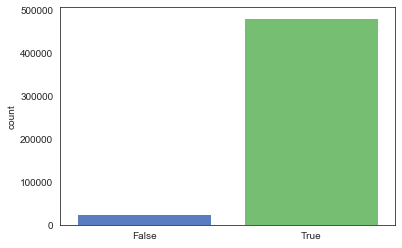

In [20]:
sns.countplot(filtered_entries)

In [21]:
hulu=hulu[filtered_entries]

In [22]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482307 entries, 0 to 508268
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   userid               482307 non-null  object 
 1   q                    482307 non-null  object 
 2   user_cat             482307 non-null  object 
 3   total_sessions       482307 non-null  float64
 4   total_orders         482307 non-null  float64
 5   avg_time             482307 non-null  float64
 6   avg_amount           482307 non-null  float64
 7   logistic_orders      482307 non-null  float64
 8   lunch_orders         482307 non-null  float64
 9   dinner_orders        482307 non-null  float64
 10  weekday_orders       482307 non-null  float64
 11  weekend_orders       482307 non-null  float64
 12  restaurant_orders    482307 non-null  float64
 13  nv_orders            482307 non-null  float64
 14  total_products       482307 non-null  float64
 15  orders_discount  

In [23]:
hulu.describe()

,total_sessions,total_orders,avg_time,avg_amount,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,nv_orders,total_products,orders_discount,orders_voucher,confirmed_orders,couisine_diversitiy,hamburguesas,pizzas,helados,othersi
count,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.00000,482307.000000,482307.000000,482307.000000,482307.000000
mean,4.939207,5.084863,28.003835,467.150898,1.620824,1.734163,3.350700,2.438611,2.646252,4.886506,0.198357,8.815452,1.597290,0.519296,4.958873,2.08828,0.815024,2.032044,0.136836,4.654641
std,5.290327,5.603058,18.642697,296.387067,2.715134,3.114443,3.962881,3.309761,3.057047,5.487767,0.612175,10.922619,2.249488,0.962138,5.510871,1.45461,1.668187,3.005455,0.476464,5.263057
min,1.000000,1.000000,0.000017,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,13.100781,272.790000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,24.098737,414.710000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,0.000000,5.000000,1.000000,0.000000,3.000000,2.00000,0.000000,1.000000,0.000000,3.000000
75%,6.000000,7.000000,39.035117,600.675000,2.000000,2.000000,4.000000,3.000000,4.000000,6.000000,0.000000,11.000000,2.000000,1.000000,6.000000,3.00000,1.000000,3.000000,0.000000,6.000000
max,68.000000,75.000000,91.876017,2841.070000,42.000000,44.000000,61.000000,53.000000,48.000000,75.000000,5.000000,207.000000,36.000000,6.000000,74.000000,7.00000,19.000000,41.000000,4.000000,74.000000


## Se crean campos de ratios

In [24]:
hulu.columns

Index(['userid', 'q', 'user_cat', 'total_sessions', 'total_orders', 'avg_time',
       'avg_amount', 'logistic_orders', 'lunch_orders', 'dinner_orders',
       'weekday_orders', 'weekend_orders', 'restaurant_orders', 'nv_orders',
       'total_products', 'orders_discount', 'orders_voucher',
       'confirmed_orders', 'couisine_diversitiy', 'hamburguesas', 'pizzas',
       'helados', 'othersi'],
      dtype='object')

In [25]:
hulu["r_CVR"]=(hulu.total_orders/hulu.total_sessions)
hulu["r_logistic"]=(hulu.logistic_orders/hulu.total_orders)

hulu["r_lunch"]=(hulu.lunch_orders/hulu.total_orders)
hulu["r_dinner"]=(hulu.dinner_orders/hulu.total_orders)

hulu["r_weekday"]=(hulu.weekday_orders/hulu.total_orders)
hulu["r_weekend"]=(hulu.weekend_orders/hulu.total_orders)

hulu["r_restaurant"]=(hulu.restaurant_orders/hulu.total_orders)
hulu["r_nv"]=(hulu.nv_orders/hulu.total_orders)

hulu["r_products"]=(hulu.total_products/hulu.total_orders)
hulu["r_discount"]=(hulu.orders_discount/hulu.total_orders)
hulu["r_voucher"]=(hulu.orders_voucher/hulu.total_orders)
hulu["r_FR"]=(hulu.confirmed_orders/hulu.total_orders)

hulu["r_diversitiy"]=(hulu.couisine_diversitiy/hulu.total_orders)
hulu["r_hamburguesas"]=(hulu.hamburguesas/hulu.total_orders)
hulu["r_pizzas"]=(hulu.pizzas/hulu.total_orders)
hulu["r_helados"]=(hulu.helados/hulu.total_orders)
hulu["r_others"]=(hulu.othersi/hulu.total_orders)

In [26]:
hulu.describe()

,total_sessions,total_orders,avg_time,avg_amount,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,...,r_nv,r_products,r_discount,r_voucher,r_FR,r_diversitiy,r_hamburguesas,r_pizzas,r_helados,r_others
count,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,...,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000,482307.000000
mean,4.939207,5.084863,28.003835,467.150898,1.620824,1.734163,3.350700,2.438611,2.646252,4.886506,...,0.042774,1.718423,0.366695,0.176877,0.970556,0.615609,0.161857,0.417003,0.035653,0.914229
std,5.290327,5.603058,18.642697,296.387067,2.715134,3.114443,3.962881,3.309761,3.057047,5.487767,...,0.149816,0.920112,0.376815,0.326625,0.122780,0.324085,0.282325,0.388599,0.146056,0.210745
min,1.000000,1.000000,0.000017,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,13.100781,272.790000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,24.098737,414.710000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,...,0.000000,1.500000,0.250000,0.000000,1.000000,0.500000,0.000000,0.333333,0.000000,1.000000
75%,6.000000,7.000000,39.035117,600.675000,2.000000,2.000000,4.000000,3.000000,4.000000,6.000000,...,0.000000,2.000000,0.666667,0.200000,1.000000,1.000000,0.250000,0.750000,0.000000,1.000000
max,68.000000,75.000000,91.876017,2841.070000,42.000000,44.000000,61.000000,53.000000,48.000000,75.000000,...,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
hulu.columns

Index(['userid', 'q', 'user_cat', 'total_sessions', 'total_orders', 'avg_time',
       'avg_amount', 'logistic_orders', 'lunch_orders', 'dinner_orders',
       'weekday_orders', 'weekend_orders', 'restaurant_orders', 'nv_orders',
       'total_products', 'orders_discount', 'orders_voucher',
       'confirmed_orders', 'couisine_diversitiy', 'hamburguesas', 'pizzas',
       'helados', 'othersi', 'r_CVR', 'r_logistic', 'r_lunch', 'r_dinner',
       'r_weekday', 'r_weekend', 'r_restaurant', 'r_nv', 'r_products',
       'r_discount', 'r_voucher', 'r_FR', 'r_diversitiy', 'r_hamburguesas',
       'r_pizzas', 'r_helados', 'r_others'],
      dtype='object')

## Análisis exploratiorio

In [28]:
pd.crosstab(index = hulu.user_cat.fillna('missing'), columns = hulu.q.fillna('missing'), values = hulu.total_orders.fillna('missing'), aggfunc = "count", dropna=False, margins=True, normalize= False)

q,Q3,Q4,All
user_cat,,,
HU,22342,21433,43775
LU,217896,220636,438532
All,240238,242069,482307


In [29]:
pd.crosstab(index = hulu.user_cat.fillna('missing'), columns = hulu.q.fillna('missing'), values = hulu.total_orders.fillna('missing'), aggfunc = "count", dropna=False, margins=False, normalize='columns')

q,Q3,Q4
user_cat,,
HU,0.092999,0.088541
LU,0.907001,0.911459


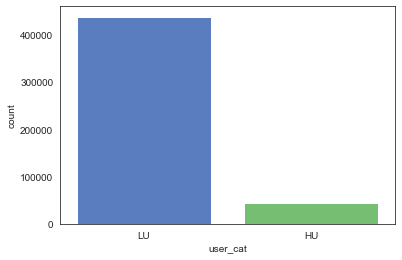

In [30]:
sns.countplot(x='user_cat',data=hulu)

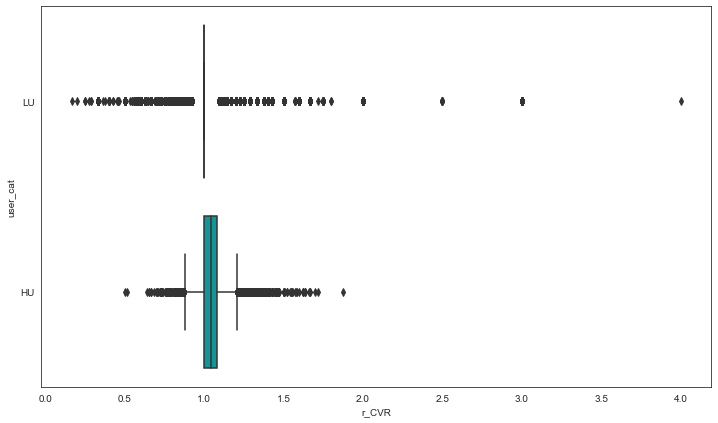

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_CVR',y='user_cat',data=hulu,palette='winter')

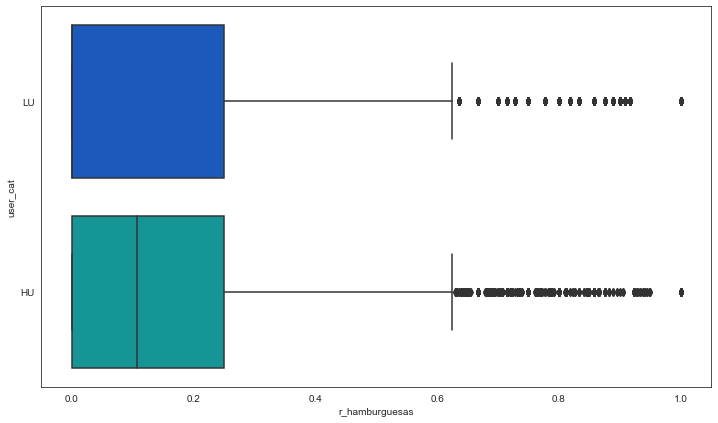

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_hamburguesas',y='user_cat',data=hulu,palette='winter')

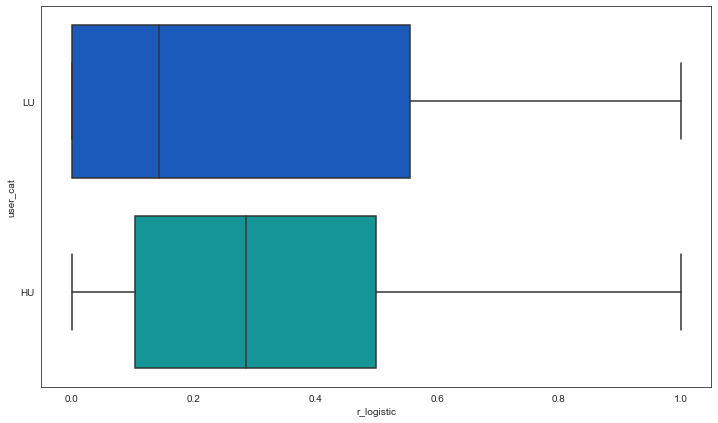

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_logistic',y='user_cat',data=hulu,palette='winter')

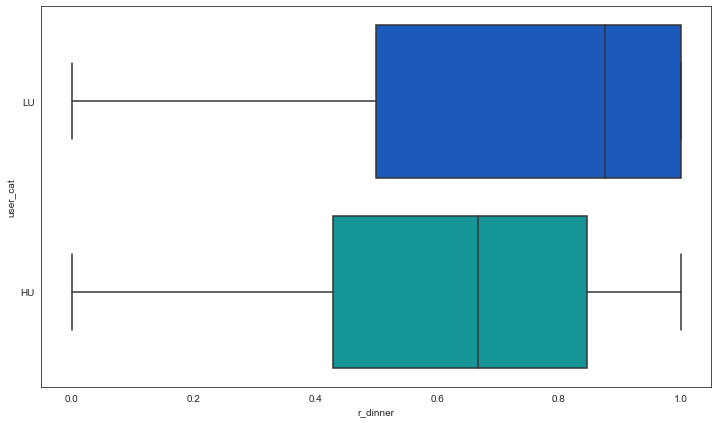

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_dinner',y='user_cat',data=hulu,palette='winter')

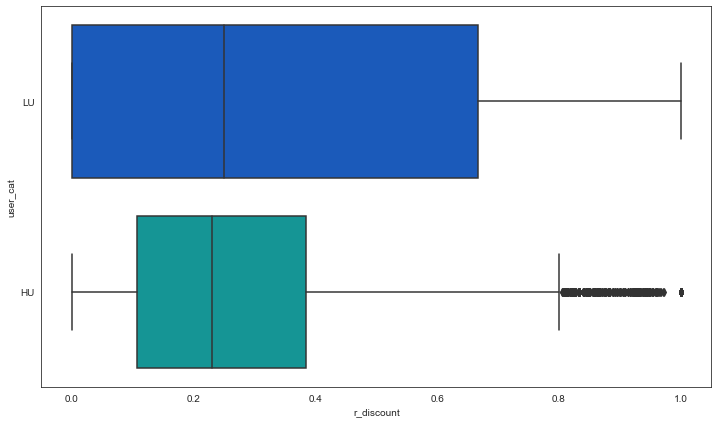

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_discount',y='user_cat',data=hulu.loc[hulu.r_discount<=1],palette='winter')

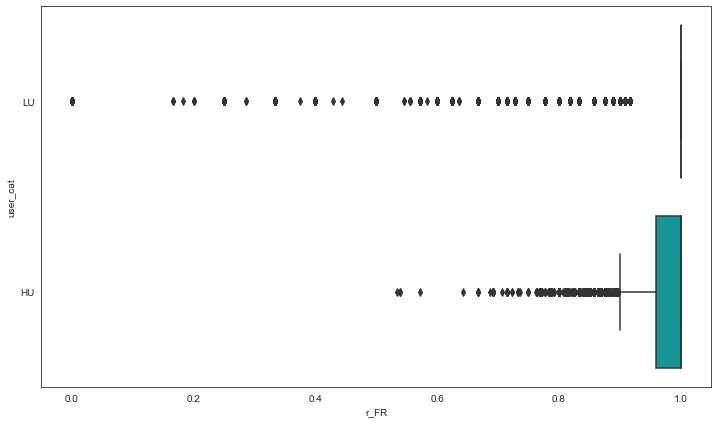

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_FR',y='user_cat',data=hulu,palette='winter')

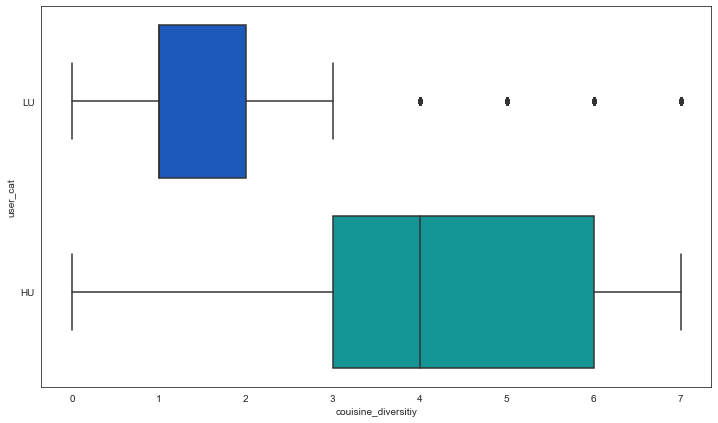

In [37]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='couisine_diversitiy',y='user_cat',data=hulu,palette='winter')

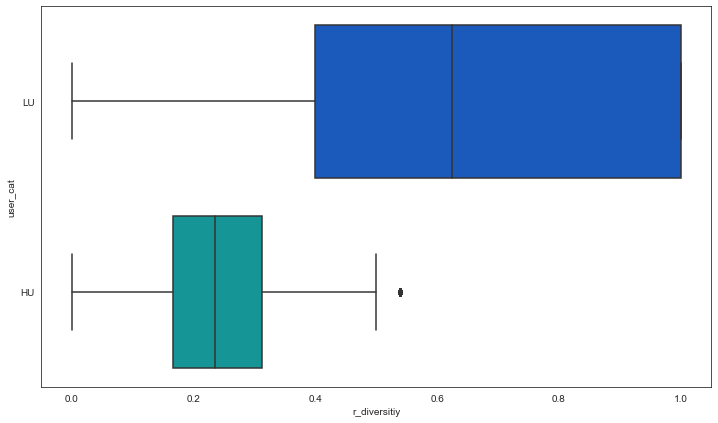

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_diversitiy',y='user_cat',data=hulu,palette='winter')

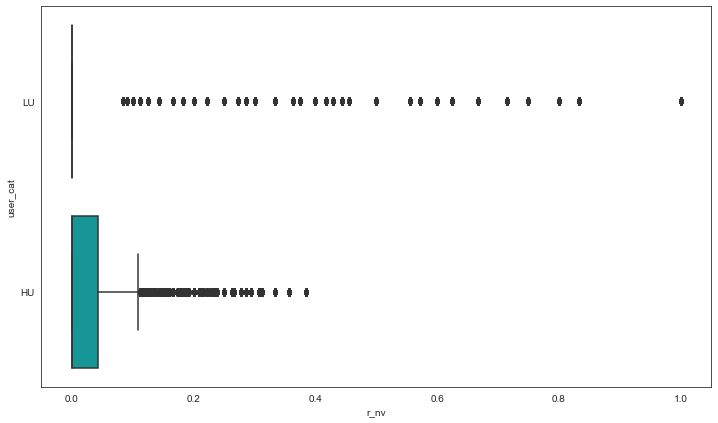

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='r_nv',y='user_cat',data=hulu,palette='winter')

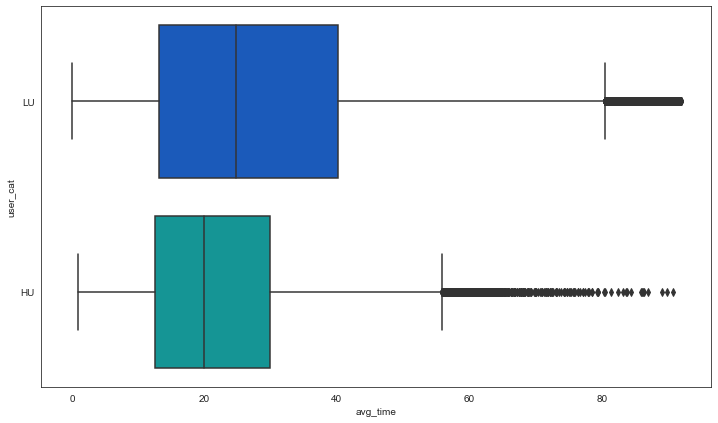

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='avg_time',y='user_cat',data=hulu,palette='winter')

Text(0.5, 0, 'total_orders')

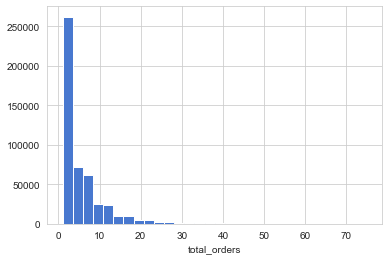

In [41]:
sns.set_style('whitegrid')
hulu['total_orders'].hist(bins=30)
plt.xlabel('total_orders')

Text(0.5, 0, 'avg_amount')

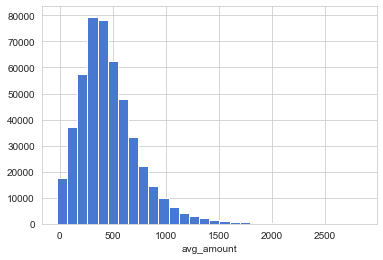

In [42]:
sns.set_style('whitegrid')
hulu['avg_amount'].hist(bins=30)
plt.xlabel('avg_amount')

Text(0.5, 0, 'r_CVR')

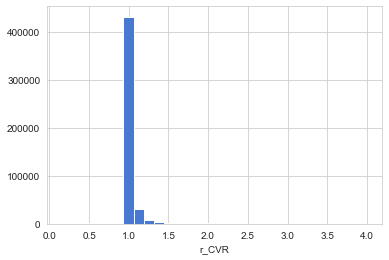

In [43]:
sns.set_style('whitegrid')
hulu['r_CVR'].hist(bins=30)
plt.xlabel('r_CVR')

### Concateno info del usuario de Q3 vs Q4

In [44]:
hulu.userid.loc[hulu.q=='Q3'].count()

240238

In [45]:
hulu.userid.loc[hulu.q=='Q4'].count()

242069

In [46]:
pd.crosstab(index = hulu.q, columns = hulu.user_cat, values = hulu.total_orders, aggfunc = "count", dropna=False, margins=True, normalize= False)

user_cat,HU,LU,All
q,,,
Q3,22342,217896,240238
Q4,21433,220636,242069
All,43775,438532,482307


In [47]:
q3=hulu.loc[hulu.q=='Q3']
q4=hulu.loc[hulu.q=='Q4']

In [48]:
hulu_q3_q4=q3.merge(q4, how="outer", on="userid",suffixes=('_q3', '_q4'))

In [49]:
hulu_q3_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314370 entries, 0 to 314369
Data columns (total 79 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   userid                  314370 non-null  object 
 1   q_q3                    240238 non-null  object 
 2   user_cat_q3             240238 non-null  object 
 3   total_sessions_q3       240238 non-null  float64
 4   total_orders_q3         240238 non-null  float64
 5   avg_time_q3             240238 non-null  float64
 6   avg_amount_q3           240238 non-null  float64
 7   logistic_orders_q3      240238 non-null  float64
 8   lunch_orders_q3         240238 non-null  float64
 9   dinner_orders_q3        240238 non-null  float64
 10  weekday_orders_q3       240238 non-null  float64
 11  weekend_orders_q3       240238 non-null  float64
 12  restaurant_orders_q3    240238 non-null  float64
 13  nv_orders_q3            240238 non-null  float64
 14  total_products_q3   

In [50]:
pd.crosstab(index = hulu_q3_q4.user_cat_q3.fillna('missing'), columns = hulu_q3_q4.user_cat_q4.fillna('missing'), values = hulu_q3_q4.userid.fillna('missing'), aggfunc = "count", dropna=False, margins=False, normalize= False)

user_cat_q4,HU,LU,missing
user_cat_q3,,,
HU,10573.0,8969.0,2800.0
LU,8221.0,140174.0,69501.0
missing,2639.0,71493.0,NaN


In [51]:
pd.crosstab(index = hulu_q3_q4.user_cat_q4.fillna('missing'), columns = hulu_q3_q4.user_cat_q3.fillna('missing'), values = hulu_q3_q4.userid.fillna('missing'), aggfunc = "count", dropna=False, margins=True, normalize='columns')

user_cat_q3,HU,LU,missing,All
user_cat_q4,,,,
HU,0.473234,0.037729,0.035599,0.068178
LU,0.401441,0.643307,0.964401,0.701835
missing,0.125325,0.318964,0.000000,0.229987


## PCA Q4

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242069 entries, 0 to 508263
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   userid               242069 non-null  object 
 1   q                    242069 non-null  object 
 2   user_cat             242069 non-null  object 
 3   total_sessions       242069 non-null  float64
 4   total_orders         242069 non-null  float64
 5   avg_time             242069 non-null  float64
 6   avg_amount           242069 non-null  float64
 7   logistic_orders      242069 non-null  float64
 8   lunch_orders         242069 non-null  float64
 9   dinner_orders        242069 non-null  float64
 10  weekday_orders       242069 non-null  float64
 11  weekend_orders       242069 non-null  float64
 12  restaurant_orders    242069 non-null  float64
 13  nv_orders            242069 non-null  float64
 14  total_products       242069 non-null  float64
 15  orders_discount  

In [50]:
q4.iloc[:,np.r_[6:22,34]].describe()

,avg_amount,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,nv_orders,total_products,orders_discount,orders_voucher,confirmed_orders,couisine_diversitiy,hamburguesas,pizzas,helados,r_FR
count,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000,242069.000000
mean,470.727112,1.754289,1.762531,3.307053,2.416233,2.653351,4.866125,0.203459,8.666579,1.596413,0.518592,4.937286,2.103111,0.826735,1.979560,0.164193,0.968451
std,297.341540,2.824292,3.100689,3.841367,3.214815,3.020126,5.368256,0.626652,10.592549,2.226161,0.971004,5.389377,1.457658,1.671105,2.905483,0.523676,0.127651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.400000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,416.980000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,0.000000,5.000000,1.000000,0.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,602.500000,2.000000,2.000000,4.000000,3.000000,4.000000,6.000000,0.000000,11.000000,2.000000,1.000000,6.000000,3.000000,1.000000,3.000000,0.000000,1.000000
max,2841.070000,42.000000,44.000000,49.000000,49.000000,41.000000,74.000000,5.000000,202.000000,36.000000,6.000000,70.000000,7.000000,19.000000,41.000000,4.000000,1.000000


In [51]:
# me quedo sólo con valores absolutos
hulu_q4=q4.iloc[:,np.r_[2,6:17,18:23,34]].dropna(0)

In [52]:
#hulu_q4.to_csv("hulu_q4.csv",index=False)

In [53]:
hulu_q4.head()

,user_cat,avg_amount,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,nv_orders,total_products,orders_discount,orders_voucher,couisine_diversitiy,hamburguesas,pizzas,helados,othersi,r_FR
0,LU,672.95,0.0,0.0,6.0,1.0,5.0,6.0,0.0,17.0,1.0,1.0,2.0,0.0,1.0,0.0,6.0,1.0
2,HU,373.11,0.0,10.0,10.0,11.0,9.0,20.0,0.0,37.0,4.0,0.0,4.0,0.0,9.0,0.0,19.0,1.0
3,LU,289.50,1.0,0.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0
5,LU,519.38,0.0,0.0,3.0,1.0,2.0,3.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0
6,HU,382.80,9.0,16.0,9.0,18.0,7.0,24.0,1.0,37.0,8.0,1.0,6.0,0.0,8.0,0.0,23.0,1.0


In [54]:
# creo variable dummy para poder aplicar el modelo
hulu_q4.loc[hulu_q4.user_cat=="HU","user_cat"]=1
hulu_q4.loc[hulu_q4.user_cat=="LU","user_cat"]=0

In [55]:
# sns.color_palette("husl", 8)
# sns.pairplot(hulu_q4,hue='user_cat')

In [56]:
#PCA
from sklearn.decomposition import PCA

In [57]:
# para correr el modelo saco info de usercat y total de sesiones
scaler = StandardScaler()
scaler.fit(hulu_q4.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
scaled_data = scaler.transform(hulu_q4.iloc[:,1:])

In [59]:
pca = PCA(n_components=2)

In [60]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
x_pca = pca.transform(scaled_data)

In [62]:
scaled_data.shape

(242069, 17)

In [63]:
x_pca.shape

(242069, 2)

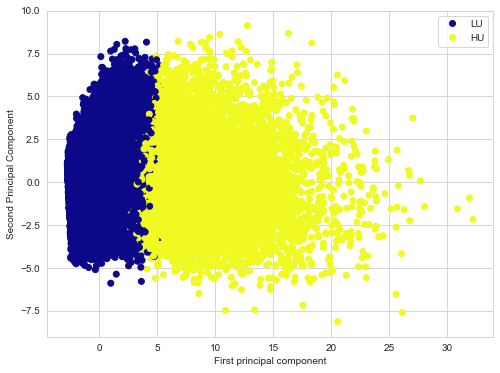

In [64]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=hulu_q4['user_cat'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.legend(handles=scatter.legend_elements()[0],labels=['LU','HU'])

In [65]:
q4_comp = pd.DataFrame(pca.components_,columns=hulu_q4.iloc[:,1:].columns)
q4_comp

,avg_amount,logistic_orders,lunch_orders,dinner_orders,weekday_orders,weekend_orders,restaurant_orders,nv_orders,total_products,orders_discount,orders_voucher,couisine_diversitiy,hamburguesas,pizzas,helados,othersi,r_FR
0,0.021604,0.255975,0.258424,0.292801,0.311109,0.306573,0.347899,0.093252,0.319064,0.238445,0.06038,0.266764,0.203559,0.245058,0.072438,0.347237,0.014601
1,-0.531933,0.205045,0.204025,-0.222303,0.082438,-0.161036,-0.079660,0.329226,-0.144411,0.165966,0.58081,0.039755,0.008619,-0.132922,0.119624,-0.067019,-0.112390


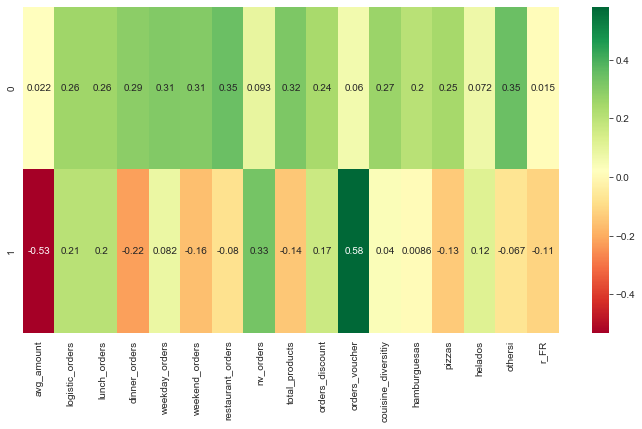

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(q4_comp,cmap='RdYlGn', annot=True)

#PiYG

## Desition tree classificatio para entender las características de los LU y HU.
#### se elimina total orders y total sessions y como reemplazo se utiliza user FR

In [67]:
q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242069 entries, 0 to 508263
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   userid               242069 non-null  object 
 1   q                    242069 non-null  object 
 2   user_cat             242069 non-null  object 
 3   total_sessions       242069 non-null  float64
 4   total_orders         242069 non-null  float64
 5   avg_time             242069 non-null  float64
 6   avg_amount           242069 non-null  float64
 7   logistic_orders      242069 non-null  float64
 8   lunch_orders         242069 non-null  float64
 9   dinner_orders        242069 non-null  float64
 10  weekday_orders       242069 non-null  float64
 11  weekend_orders       242069 non-null  float64
 12  restaurant_orders    242069 non-null  float64
 13  nv_orders            242069 non-null  float64
 14  total_products       242069 non-null  float64
 15  orders_discount  

In [88]:
hulu_q4=q4.iloc[:,np.r_[2,24,26,28,29,31,33,34,37]].dropna(0)

# creo variable dummy para poder aplicar el modelo
# hulu_q4.loc[hulu_q4.user_cat=="HU","user_cat"]=1
# hulu_q4.loc[hulu_q4.user_cat=="LU","user_cat"]=0

In [89]:
# # Change data type
# hulu_q4["avg_amount"]=hulu_q4["avg_amount"].astype('float')

In [90]:
hulu_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242069 entries, 0 to 508263
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_cat      242069 non-null  object 
 1   r_logistic    242069 non-null  float64
 2   r_dinner      242069 non-null  float64
 3   r_weekend     242069 non-null  float64
 4   r_restaurant  242069 non-null  float64
 5   r_products    242069 non-null  float64
 6   r_voucher     242069 non-null  float64
 7   r_FR          242069 non-null  float64
 8   r_pizzas      242069 non-null  float64
dtypes: float64(8), object(1)
memory usage: 18.5+ MB


In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics m


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [92]:
X_train, X_test, y_train, y_test = train_test_split(hulu_q4.drop('user_cat',axis=1), 
                                                    hulu_q4['user_cat'], test_size=0.30, 
                                                    random_state=2)

In [93]:
y_train.head()

488130    HU
216508    LU
31168     LU
293976    HU
259575    LU
Name: user_cat, dtype: object

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169448 entries, 488130 to 187385
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   r_logistic    169448 non-null  float64
 1   r_dinner      169448 non-null  float64
 2   r_weekend     169448 non-null  float64
 3   r_restaurant  169448 non-null  float64
 4   r_products    169448 non-null  float64
 5   r_voucher     169448 non-null  float64
 6   r_FR          169448 non-null  float64
 7   r_pizzas      169448 non-null  float64
dtypes: float64(8)
memory usage: 11.6 MB


In [95]:
dtree = DecisionTreeClassifier(min_samples_leaf=10,
                               max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          HU       1.00      0.08      0.15      6419
          LU       0.92      1.00      0.96     66202

    accuracy                           0.92     72621
   macro avg       0.96      0.54      0.56     72621
weighted avg       0.93      0.92      0.89     72621



In [97]:
print(confusion_matrix(y_test,predictions))

[[  537  5882]
 [    0 66202]]


In [98]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(hulu_q4.columns[1:])

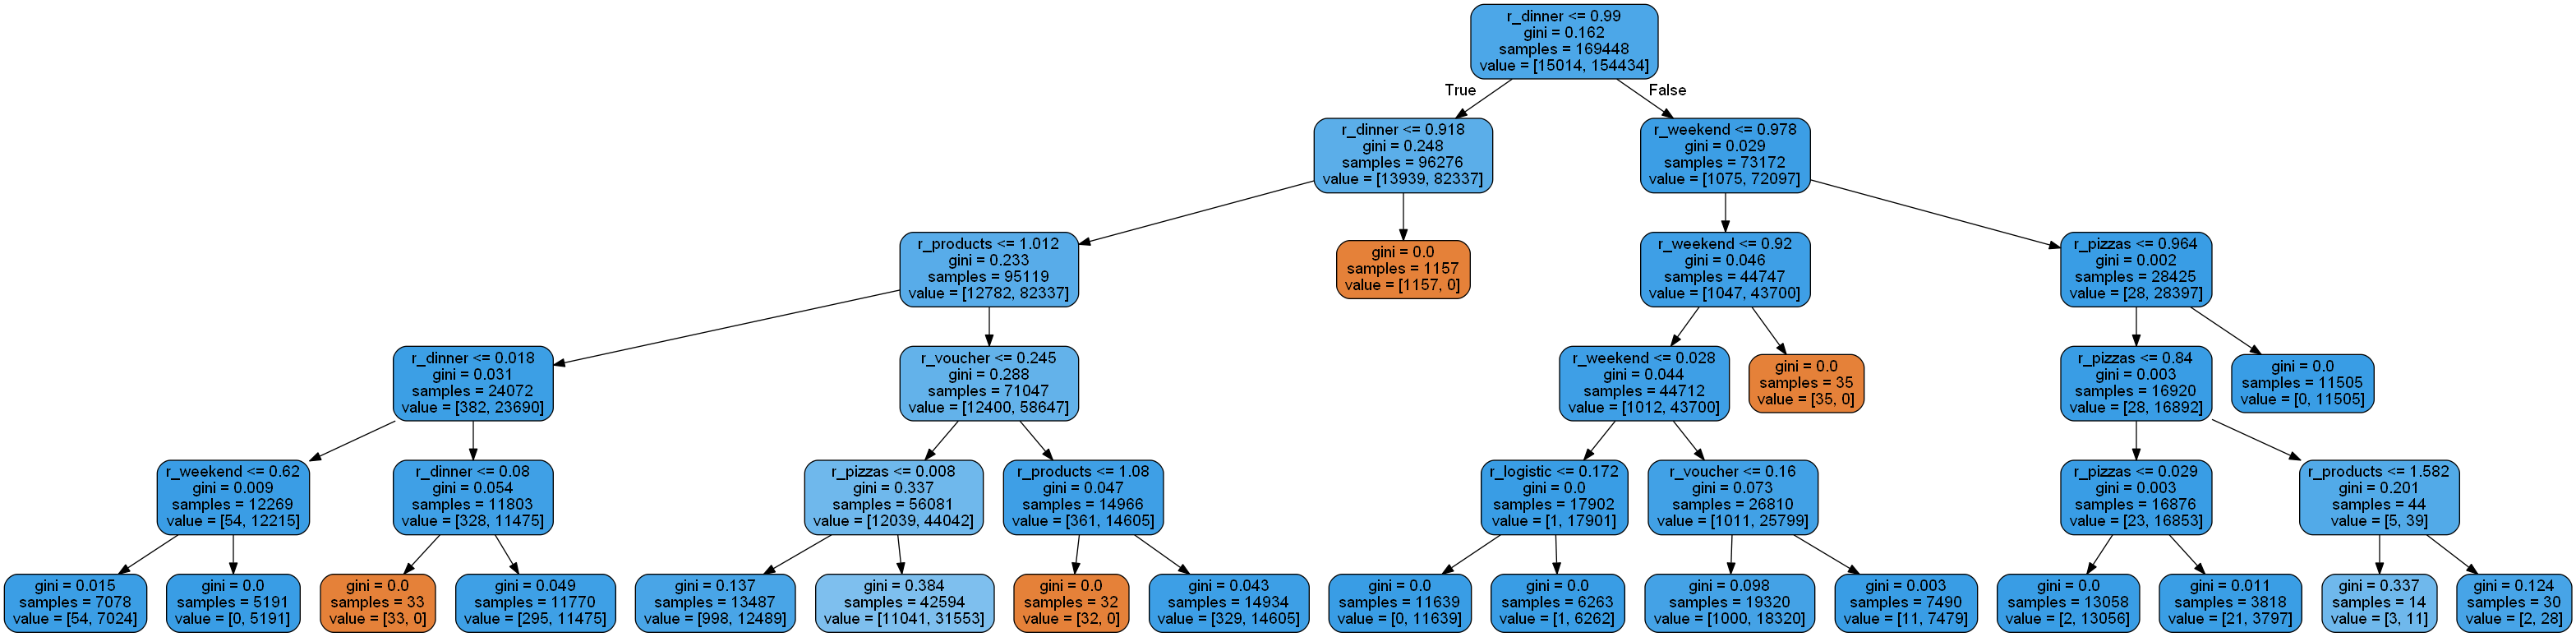

In [99]:
# conda install graphviz
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [100]:
# feature_list = X_test.columns.to_list()
# tree_classifier_feature_importances = dtree.feature_importances_
# for i in range(0,len(feature_list)):
#     print(feature_list[i] + ' ' + str(tree_classifier_feature_importances[i]))

In [101]:
# Desition tree classificatio para entender las características de los LU y HU.

from pandas import DataFrame
Data_tree = {'Features': X_test.columns.to_list(),
        'Importance': dtree.feature_importances_
       }
  
df_tree = DataFrame(Data_tree,columns=['Features','Importance'])
df_tree.sort_values(by='Importance', ascending=True, inplace=True)
df_tree

,Features,Importance
3,r_restaurant,0.000000e+00
6,r_FR,0.000000e+00
0,r_logistic,3.542650e-08
2,r_weekend,1.963431e-02
7,r_pizzas,1.201490e-01
5,r_voucher,1.510421e-01
4,r_products,1.649619e-01
1,r_dinner,5.442127e-01


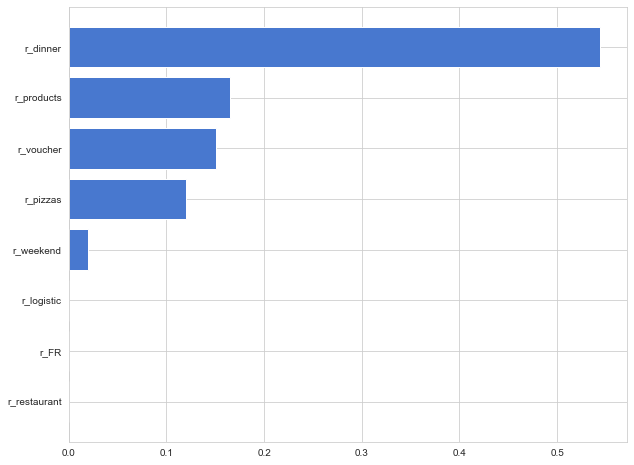

In [102]:
fig, ax = plt.subplots(figsize = (10,8))

bars = ax.barh(df_tree['Features'], df_tree['Importance'], 
        label='Percentage of yes responses to question')

## XGBoost

In [103]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
# param_grid = {
#     'n_estimators': [100, 400, 700],
#     'gamma':[0,1],
#     'learning_rate': [0.05,0.1, 0.4],
#     'subsample': [0.4, 0.8, 1],
#     'scale_pos_weight':[1,2,4]
# }




# clf_xgb_imb_grid = GridSearchCV(classifier, param_grid, cv=5, verbose=5, n_jobs=3)
# # clf_xgb_imb_grid.fit(train_features, train_labels)

In [105]:
# feature_list = X_test.columns.to_list()
# XGboost_feature_importances = classifier.feature_importances_
# for i in range(0,len(feature_list)):
#     print(feature_list[i] + ' ' + str(XGboost_feature_importances[i]))


In [106]:
# XGBoost para entender que hace que un usuarios sea HU o LU Q4
from pandas import DataFrame
Data = {'Features': X_test.columns.to_list(),
        'Importance': classifier.feature_importances_
       }
  
df = DataFrame(Data,columns=['Features','Importance'])
df.sort_values(by='Importance', ascending=True, inplace=True)
df

,Features,Importance
0,r_logistic,0.068949
4,r_products,0.071310
7,r_pizzas,0.088277
3,r_restaurant,0.099294
1,r_dinner,0.122621
2,r_weekend,0.126503
5,r_voucher,0.183877
6,r_FR,0.239169


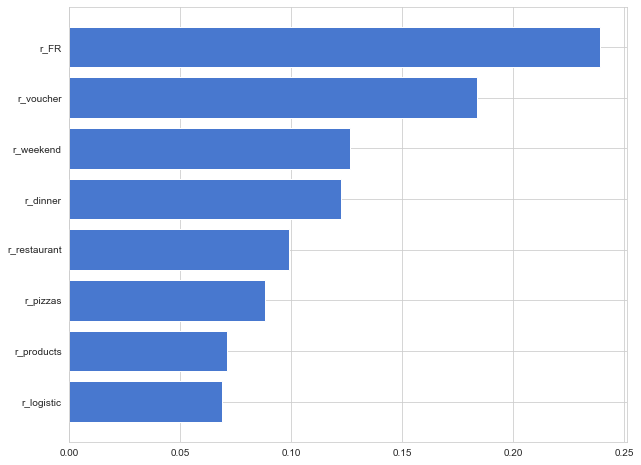

In [107]:
fig, ax = plt.subplots(figsize = (10,8))

bars1 = ax.barh(df['Features'], df['Importance'], 
        label='Percentage of yes responses to question')

In [108]:
## Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



[[ 5648   771]
 [    0 66202]]


0.9893832362539762

In [109]:
## Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.97 %
Standard Deviation: 0.09 %


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

NameError: name 'X_train' is not defined

In [8]:
predictions

NameError: name 'predictions' is not defined

# Análisis de transición de usuarios HU- LO

## Creo variable transition Up-Down

In [225]:
hulu_q3_q4[["user_cat_q3","user_cat_q4"]].describe()

,user_cat_q3,user_cat_q4
count,167937,167937
unique,2,2
top,LU,LU
freq,148395,149143


In [ ]:
hulu_q3_q4["trans"]=hulu_q3_q4.user_cat_q3+hulu_q3_q4.user_cat_q4
hulu_q3_q4["trans"].describe()

In [273]:
hulu_q3_q4["transition_up"]=0
hulu_q3_q4["transition_down"]=0

In [274]:
hulu_q3_q4.loc[hulu_q3_q4.trans=="HULU","transition_down"]=1
hulu_q3_q4.loc[hulu_q3_q4.trans=="LUHU","transition_up"]=1

In [248]:
hulu_q3_q4.transition_down.value_counts()

0    158968
1      8969
Name: transition_down, dtype: int64

In [249]:
hulu_q3_q4.dropna(axis=0,inplace=True)

In [250]:
hulu_q3_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167937 entries, 0 to 240236
Columns: 101 entries, userid to rr_others
dtypes: float64(93), int64(2), object(6)
memory usage: 130.7+ MB


In [251]:
# hulu_q3_q4.to_csv("hulu_q3_q4.csv",index=False)

### Ratios de ratios para analizar variación Q3 vs. Q4

In [252]:
hulu_q3_q4["rr_amount"]=(hulu_q3_q4.avg_amount_q4/hulu_q3_q4.avg_amount_q3)
hulu_q3_q4["rr_time"]=(hulu_q3_q4.avg_time_q4/hulu_q3_q4.avg_time_q3)


hulu_q3_q4["rr_CVR"]=(hulu_q3_q4.r_CVR_q4/hulu_q3_q4.r_CVR_q3)
hulu_q3_q4["rr_logistic"]=(hulu_q3_q4.r_logistic_q4/hulu_q3_q4.r_logistic_q3)

hulu_q3_q4["rr_lunch"]=(hulu_q3_q4.r_lunch_q4/hulu_q3_q4.r_lunch_q3)
hulu_q3_q4["rr_dinner"]=(hulu_q3_q4.r_dinner_q4/hulu_q3_q4.r_dinner_q3)

hulu_q3_q4["rr_weekday"]=(hulu_q3_q4.r_weekday_q4/hulu_q3_q4.r_weekday_q3)
hulu_q3_q4["rr_weekend"]=(hulu_q3_q4.r_weekend_q4/hulu_q3_q4.r_weekend_q3)

hulu_q3_q4["rr_restaurant"]=(hulu_q3_q4.r_restaurant_q4/hulu_q3_q4.r_restaurant_q3)
hulu_q3_q4["rr_nv"]=(hulu_q3_q4.r_nv_q4/hulu_q3_q4.r_nv_q3)-1

hulu_q3_q4["rr_products"]=(hulu_q3_q4.r_products_q4/hulu_q3_q4.r_products_q3)
hulu_q3_q4["rr_discount"]=(hulu_q3_q4.r_discount_q4/hulu_q3_q4.r_discount_q3)
hulu_q3_q4["rr_voucher"]=(hulu_q3_q4.r_voucher_q4/hulu_q3_q4.r_voucher_q3)
hulu_q3_q4["rr_FR"]=(hulu_q3_q4.r_FR_q4/hulu_q3_q4.r_FR_q3)-1

hulu_q3_q4["rr_diversitiy"]=(hulu_q3_q4.r_diversitiy_q4/hulu_q3_q4.r_diversitiy_q3)
hulu_q3_q4["rr_hamburguesas"]=(hulu_q3_q4.r_hamburguesas_q4/hulu_q3_q4.r_hamburguesas_q3)
hulu_q3_q4["rr_pizzas"]=(hulu_q3_q4.r_pizzas_q4/hulu_q3_q4.r_pizzas_q3)
hulu_q3_q4["rr_helados"]=(hulu_q3_q4.r_helados_q4/hulu_q3_q4.r_helados_q3)
hulu_q3_q4["rr_others"]=(hulu_q3_q4.r_others_q4/hulu_q3_q4.r_others_q3)

In [253]:
hulu_q3_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167937 entries, 0 to 240236
Columns: 101 entries, userid to rr_others
dtypes: float64(93), int64(2), object(6)
memory usage: 130.7+ MB


In [254]:
hulu_q3_q4.iloc[:,np.r_[1:101]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167937 entries, 0 to 240236
Data columns (total 100 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   q_q3                    167937 non-null  object 
 1   user_cat_q3             167937 non-null  object 
 2   total_sessions_q3       167937 non-null  float64
 3   total_orders_q3         167937 non-null  float64
 4   avg_time_q3             167937 non-null  float64
 5   avg_amount_q3           167937 non-null  float64
 6   logistic_orders_q3      167937 non-null  float64
 7   lunch_orders_q3         167937 non-null  float64
 8   dinner_orders_q3        167937 non-null  float64
 9   weekday_orders_q3       167937 non-null  float64
 10  weekend_orders_q3       167937 non-null  float64
 11  restaurant_orders_q3    167937 non-null  float64
 12  nv_orders_q3            167937 non-null  float64
 13  total_products_q3       167937 non-null  float64
 14  orders_discount_q3 

In [255]:
hulu_q3_q4 = hulu_q3_q4.replace([np.inf, -np.inf],[1,-1])

In [256]:
hulu_q3_q4=hulu_q3_q4.fillna(0)

In [257]:
hulu_q3_q4.iloc[:,np.r_[2,81,82,85,87,88,91,92,94,95,98]].head()

,user_cat_q3,transition_down,rr_amount,rr_logistic,rr_dinner,rr_weekday,rr_nv,rr_products,rr_voucher,rr_FR,rr_pizzas
0,LU,0,1.043061,0.000000,0.666667,0.888889,0.0,0.952381,0.000000,0.000000,1.185185
1,LU,0,1.274718,0.000000,2.000000,1.000000,0.0,1.333333,0.333333,0.000000,1.666667
2,LU,0,0.574613,1.000000,1.041667,4.166667,0.0,0.937500,1.000000,0.000000,0.833333
4,LU,0,2.473722,0.733333,1.344444,1.833333,-1.0,1.181481,0.000000,0.026667,2.444444
5,HU,0,1.514459,1.428571,1.428571,1.208791,0.0,1.280788,0.000000,-0.142857,1.428571


In [258]:
#hulu_q3_q4.to_csv("hulu_q3_q4.csv",index=False)

In [259]:
# Separamos HU Q3 de LU Q3

transition_HU=transition.loc[transition.user_cat_q3=='HU'].drop(columns='user_cat_q3')
transition_LU=transition.loc[transition.user_cat_q3=='LU'].drop(columns='user_cat_q3')

transition_HU.columns

Index(['transition_down', 'rr_amount', 'rr_logistic', 'rr_dinner',
       'rr_weekday', 'rr_nv', 'rr_products', 'rr_voucher', 'rr_FR',
       'rr_pizzas'],
      dtype='object')

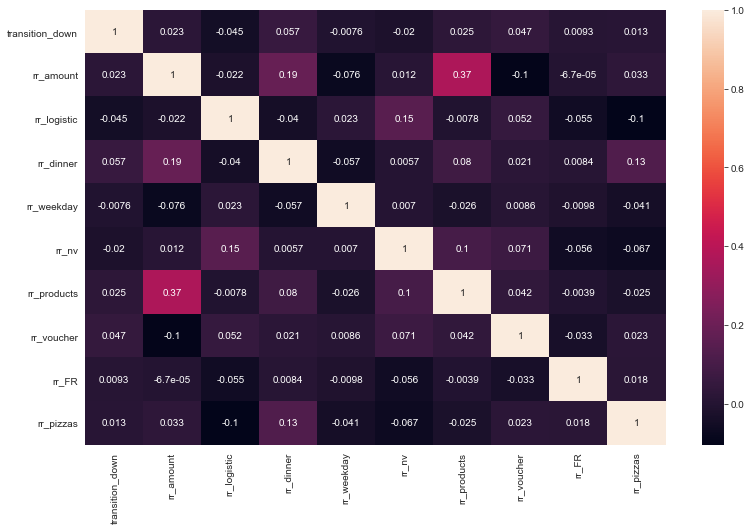

In [260]:
plt.figure(figsize=(13, 8))
corrMatrix = transition_HU.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# EDA Q4 vs Q3

In [261]:
transition_HU.transition_down=transition_HU.transition_down.astype('object')
transition_HU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 5 to 239892
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transition_down  19542 non-null  object 
 1   rr_amount        19542 non-null  float64
 2   rr_logistic      19542 non-null  float64
 3   rr_dinner        19542 non-null  float64
 4   rr_weekday       19542 non-null  float64
 5   rr_nv            19542 non-null  float64
 6   rr_products      19542 non-null  float64
 7   rr_voucher       19542 non-null  float64
 8   rr_FR            19542 non-null  float64
 9   rr_pizzas        19542 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [266]:
transition_HU.transition_down.loc[transition_HU.transition_down==1] ="HULU"
transition_HU.transition_down.loc[transition_HU.transition_down==0]="HUHU"

C:\Users\leticia.colombo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [267]:
transition_HU.transition_down.value_counts()

HUHU    10573
HULU     8969
Name: transition_down, dtype: int64

Text(0, 0.5, 'Density')

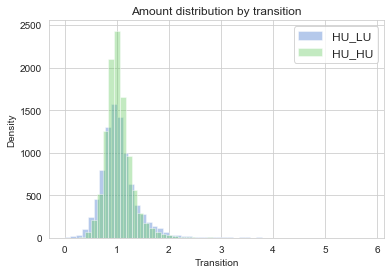

In [268]:
df1 = transition_HU[transition_HU.transition_down == 'HULU']
sns.distplot(df1['rr_amount'],  kde=False, label='HU_LU')


df2 = transition_HU[transition_HU.transition_down == 'HUHU']
sns.distplot(df2['rr_amount'],  kde=False, label='HU_HU')



plt.legend(prop={'size': 12})
plt.title('Amount distribution by transition')
plt.xlabel('Transition')
plt.ylabel('Density')

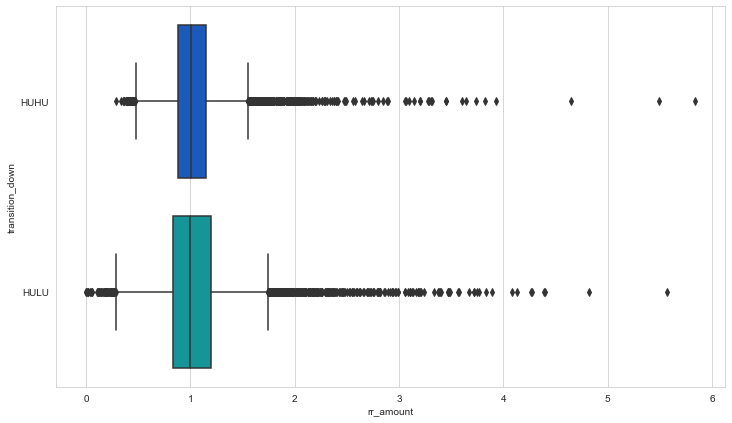

In [269]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rr_amount',y='transition_down',data=transition_HU,palette='winter')

Text(0, 0.5, 'Density')

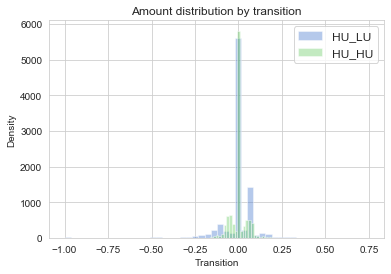

In [270]:
df1 = transition_HU[transition_HU.transition_down == 'HULU']
sns.distplot(df1['rr_FR'],  kde=False, label='HU_LU')


df2 = transition_HU[transition_HU.transition_down == 'HUHU']
sns.distplot(df2['rr_FR'],  kde=False, label='HU_HU')



plt.legend(prop={'size': 12})
plt.title('Amount distribution by transition')
plt.xlabel('Transition')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

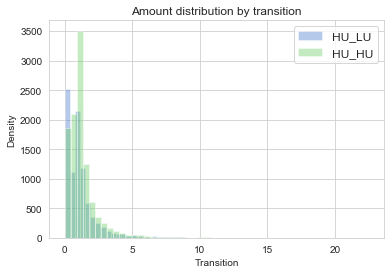

In [271]:
df1 = transition_HU[transition_HU.transition_down == 'HULU']
sns.distplot(df1['rr_logistic'],  kde=False, label='HU_LU')


df2 = transition_HU[transition_HU.transition_down == 'HUHU']
sns.distplot(df2['rr_logistic'],  kde=False, label='HU_HU')



plt.legend(prop={'size': 12})
plt.title('Amount distribution by transition')
plt.xlabel('Transition')
plt.ylabel('Density')

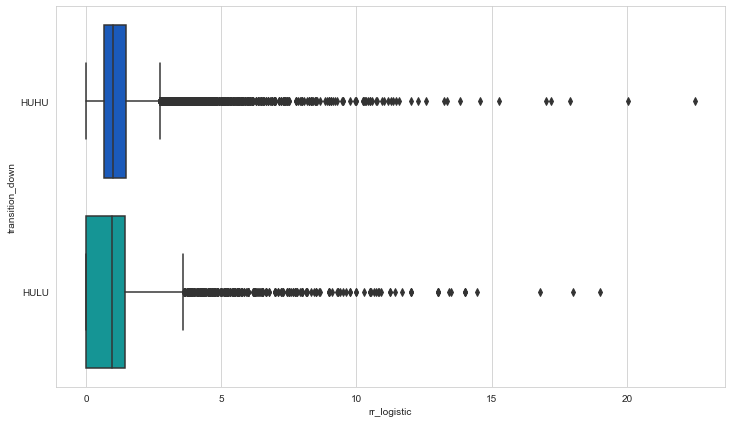

In [272]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rr_logistic',y='transition_down',data=transition_HU,palette='winter')

## PCA Q4 vs Q3

In [288]:
transition_HU.transition_down.loc[transition_HU.transition_down=="HULU"] =1
transition_HU.transition_down.loc[transition_HU.transition_down=="HUHU"]=0

C:\Users\leticia.colombo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
transition_HU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 5 to 239892
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transition_down  19542 non-null  object 
 1   rr_amount        19542 non-null  float64
 2   rr_logistic      19542 non-null  float64
 3   rr_dinner        19542 non-null  float64
 4   rr_weekday       19542 non-null  float64
 5   rr_nv            19542 non-null  float64
 6   rr_products      19542 non-null  float64
 7   rr_voucher       19542 non-null  float64
 8   rr_FR            19542 non-null  float64
 9   rr_pizzas        19542 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.3+ MB


In [291]:
transition_HU.transition_down.value_counts()  

0    10573
1     8969
Name: transition_down, dtype: int64

In [292]:
# transition[["avg_amount_q3",]]=transition[["avg_amount_q3"]].astype('float64')

In [293]:
scaler = StandardScaler()
scaler.fit(transition_HU.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [294]:
scaled_data = scaler.transform(transition_HU.iloc[:,1:])

In [295]:
#PCA
from sklearn.decomposition import PCA

In [296]:
pca = PCA(n_components=2)

In [297]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [298]:
x_pca = pca.transform(scaled_data)

In [299]:
scaled_data.shape

(19542, 9)

In [300]:
x_pca.shape

(19542, 2)

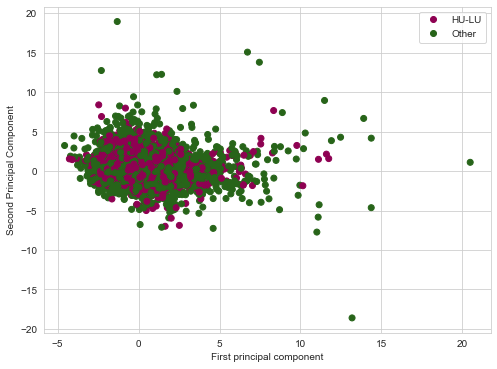

In [305]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=transition_HU['transition_down'],cmap='PiYG')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.legend(handles=scatter.legend_elements()[0],labels=['HU-LU','Other'])

In [302]:
#pca.components_
trans_comp = pd.DataFrame(pca.components_,columns=transition_HU.iloc[:,1:].columns)
trans_comp

,rr_amount,rr_logistic,rr_dinner,rr_weekday,rr_nv,rr_products,rr_voucher,rr_FR,rr_pizzas
0,0.650302,-0.100999,0.410153,-0.196739,0.072559,0.572900,-0.065275,0.019173,0.147877
1,0.051490,0.534376,-0.151873,0.120843,0.556402,0.257893,0.237901,-0.268028,-0.411818


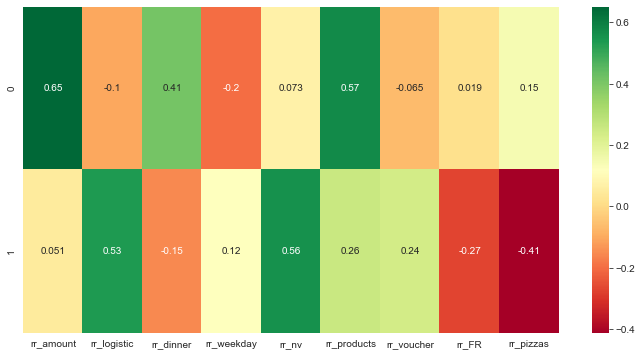

In [303]:
plt.figure(figsize=(12,6))
sns.heatmap(trans_comp,cmap='RdYlGn', annot=True)

#PiYG

In [306]:
# hulu_q3_q4.to_csv("hulu_q3_q4.csv",index=False)

## Desition tree Transition Down

In [312]:
transition_HU.transition_down=transition_HU.transition_down.astype('float')
transition_HU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 5 to 239892
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transition_down  19542 non-null  float64
 1   rr_amount        19542 non-null  float64
 2   rr_logistic      19542 non-null  float64
 3   rr_dinner        19542 non-null  float64
 4   rr_weekday       19542 non-null  float64
 5   rr_nv            19542 non-null  float64
 6   rr_products      19542 non-null  float64
 7   rr_voucher       19542 non-null  float64
 8   rr_FR            19542 non-null  float64
 9   rr_pizzas        19542 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [313]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics m


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [308]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(transition_HU.drop('transition_down',axis=1), 
                                                    transition_HU['transition_down'], test_size=0.30, 
                                                    random_state=2)

In [309]:
transition_HU.transition_down.value_counts()

0    10573
1     8969
Name: transition_down, dtype: int64

In [314]:
dtree = DecisionTreeClassifier(min_samples_leaf=10,
                               max_depth=5)
dtree.fit(X_train_t,y_train_t)

ValueError: Unknown label type: 'unknown'

In [311]:
predictions = dtree.predict(X_test_t)
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_t,predictions))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [436]:
print(confusion_matrix(y_test_t,predictions))

[[2519  619]
 [1028 1697]]


In [437]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(transition_HU.columns[1:])

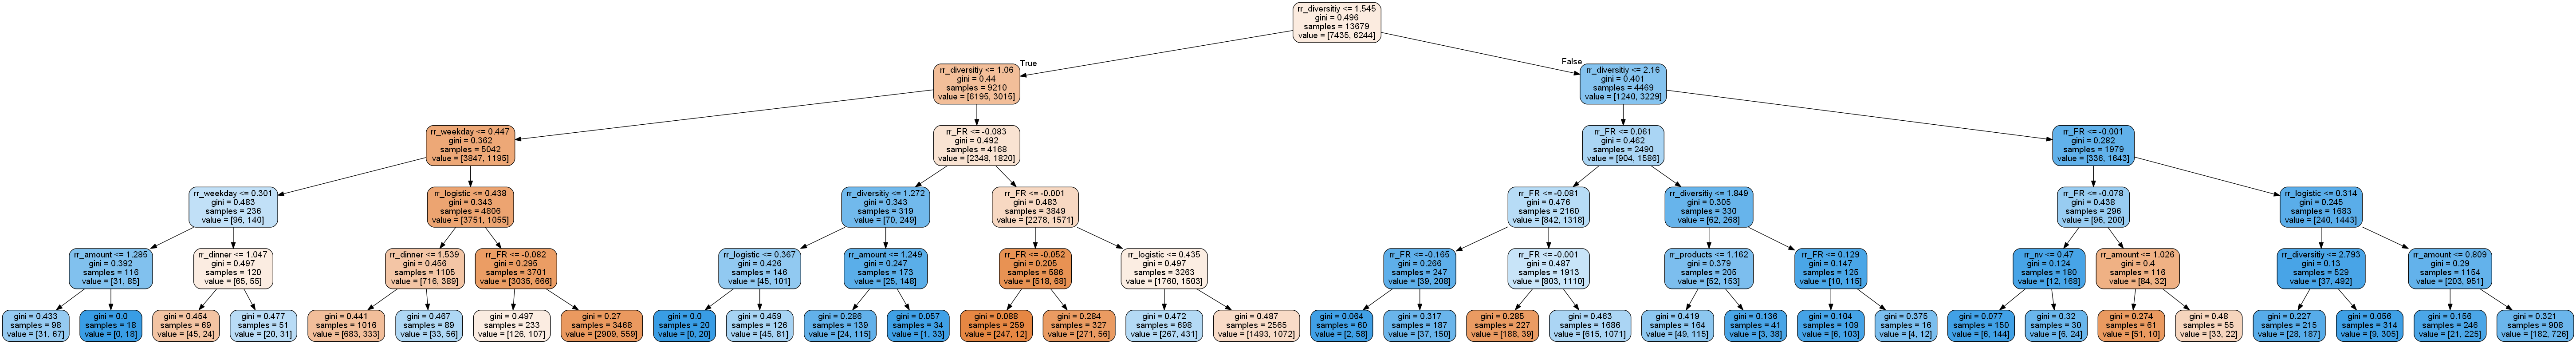

In [438]:
# conda install graphviz
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [439]:
# feature_list = X_test.columns.to_list()
# tree_classifier_feature_importances = dtree.feature_importances_
# for i in range(0,len(feature_list)):
#     print(feature_list[i] + ' ' + str(tree_classifier_feature_importances[i]))

In [440]:
# Desition tree classificatio para entender las características de los LU y HU.

from pandas import DataFrame
Data_tree = {'Features': X_test_t.columns.to_list(),
        'Importance': dtree.feature_importances_
       }
  
df_tree = DataFrame(Data_tree,columns=['Features','Importance'])
df_tree.sort_values(by='Importance', ascending=True, inplace=True)
df_tree

,Features,Importance
6,rr_voucher,0.000000
4,rr_nv,0.000676
5,rr_products,0.001764
0,rr_amount,0.006610
2,rr_dinner,0.009950
3,rr_weekday,0.037878
1,rr_logistic,0.056326
7,rr_FR,0.244750
8,rr_diversitiy,0.642047


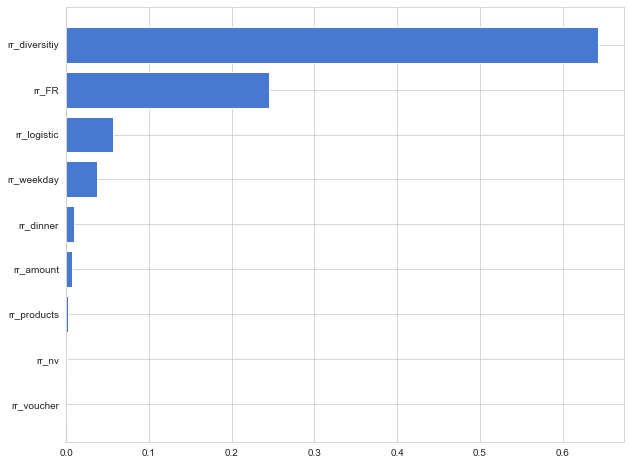

In [441]:
fig, ax = plt.subplots(figsize = (10,8))

bars = ax.barh(df_tree['Features'], df_tree['Importance'], 
        label='Percentage of yes responses to question')

## XGBoost

In [442]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

classifier.fit(X_train_t, y_train_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [443]:
# param_grid = {
#     'n_estimators': [100, 400, 700],
#     'gamma':[0,1],
#     'learning_rate': [0.05,0.1, 0.4],
#     'subsample': [0.4, 0.8, 1],
#     'scale_pos_weight':[1,2,4]
# }




# clf_xgb_imb_grid = GridSearchCV(classifier, param_grid, cv=5, verbose=5, n_jobs=3)
# # clf_xgb_imb_grid.fit(train_features, train_labels)

In [444]:
# feature_list = X_test.columns.to_list()
# XGboost_feature_importances = classifier.feature_importances_
# for i in range(0,len(feature_list)):
#     print(feature_list[i] + ' ' + str(XGboost_feature_importances[i]))


In [445]:
# XGBoost para entender que hace que un usuarios sea HU o LU Q4
from pandas import DataFrame
Data = {'Features': X_test_t.columns.to_list(),
        'Importance': classifier.feature_importances_
       }
  
df = DataFrame(Data,columns=['Features','Importance'])
df.sort_values(by='Importance', ascending=True, inplace=True)
df

,Features,Importance
0,rr_amount,0.063499
6,rr_voucher,0.069742
5,rr_products,0.069789
4,rr_nv,0.075147
2,rr_dinner,0.075737
1,rr_logistic,0.086085
3,rr_weekday,0.095165
7,rr_FR,0.228548
8,rr_diversitiy,0.236287


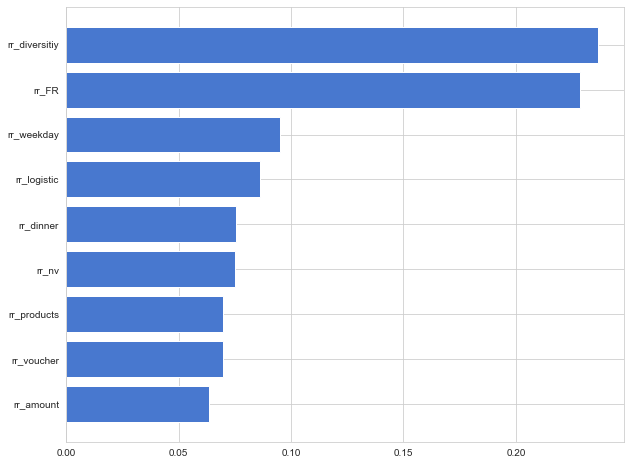

In [446]:
fig, ax = plt.subplots(figsize = (10,8))

bars1 = ax.barh(df['Features'], df['Importance'], 
        label='Percentage of yes responses to question')

In [447]:
## Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_t = classifier.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred_t)
print(cm)
accuracy_score(y_test_t, y_pred_t)



[[2564  574]
 [ 740 1985]]


0.7758826539314344

In [448]:
## Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.27 %
Standard Deviation: 0.06 %
